In [1]:
from numpy import *
from numpy.linalg import *
from scipy.integrate import *
from scipy.signal import *

%matplotlib notebook
from matplotlib.pyplot import *
import matplotlib.pyplot as pp
rcParams["figure.figsize"] = (10,6)
import matplotlib.animation as animation
import matplotlib.patches as patches
from IPython.display import HTML

In [2]:
D=1
R=0.1
theta=(3/2)*pi
x=1
y=2

<IPython.core.display.Javascript object>


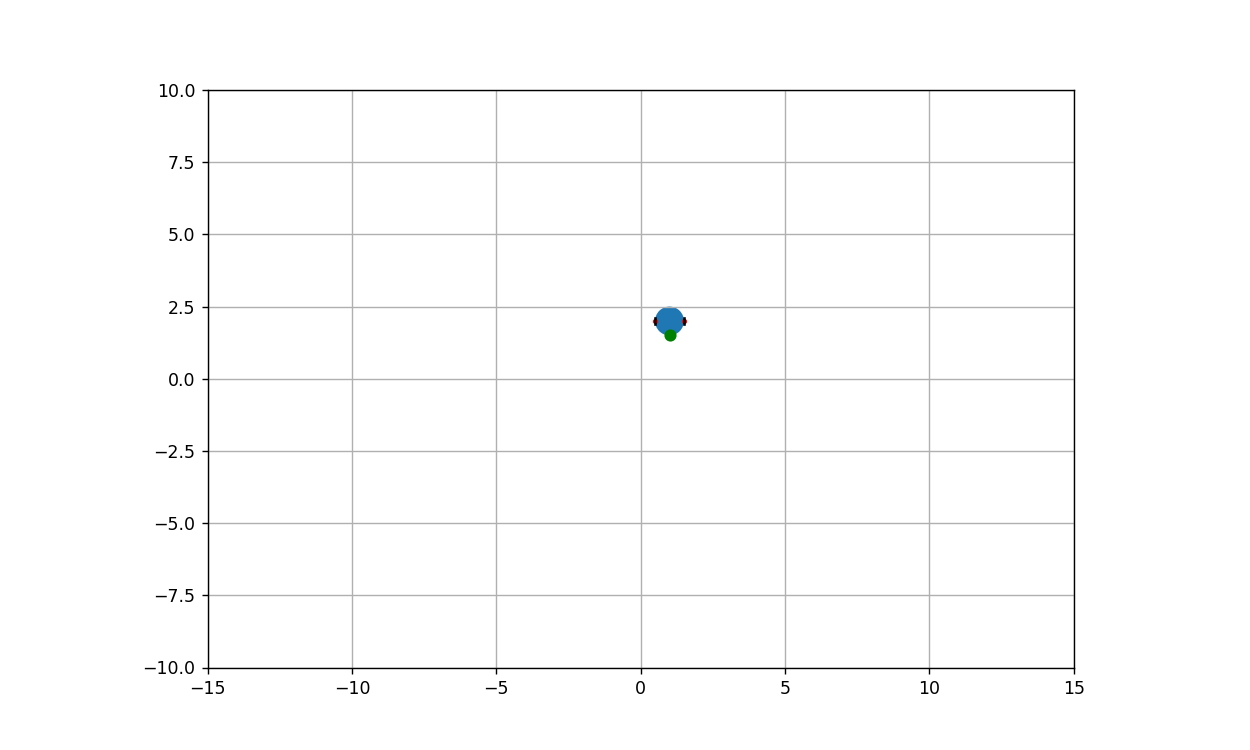

In [3]:
figure()
plot([x],[y] , 'r', ms=2)
x_front=x+(D/2)* cos(theta)
y_front= y+(D/2) * sin(theta)
plot(x_front,y_front,'go', ms=6)
plot(x+(D/2)* cos((pi)/2+theta), y+(D/2)* sin((pi)/2+theta), 'ro', ms=2)
plot(x+(D/2)* cos(-(pi)/2+theta), y+(D/2)* sin(-(pi)/2+theta), 'ro', ms=2)
def create_circle(x,y):
    circle=Circle((x,y), radius=0.5)
    return circle

def show_shape(patch):
    axes = gca()
    axes.axis([-15, 15, -10, 10])
    axes.set_aspect(1)
    grid(True)
    axes.add_patch(patch)
    show()
if __name__== '__main__':
    c= create_circle(x,y)
    show_shape(c)
x_1=x+(D/2)* cos((pi)/2+theta)-R*cos(theta)
y_1=y+(D/2)* sin((pi)/2+theta)-R*sin(theta)
x_2=x+(D/2)* cos((pi)/2+theta)+R*cos(theta)
y_2=y+(D/2)* sin((pi)/2+theta)+R*sin(theta)
x_3=x+(D/2)* cos(-(pi)/2+theta)-R*cos(theta)
y_3=y+(D/2)* sin(-(pi)/2+theta)-R*sin(theta)
x_4=x+(D/2)* cos(-(pi)/2+theta)+R*cos(theta)
y_4=y+(D/2)* sin(-(pi)/2+theta)+R*sin(theta)
plot([x_1,x_2],[y_1,y_2],"k")
plot([x_3,x_4],[y_3,y_4],"k")

In [4]:
def f(t, X, omega):
    x, y, theta = X
    omega_l, omega_r = omega
    dtheta=R*(omega_r - omega_l)/D
    dx= cos(theta)*(omega_r + omega_l)*(R/2)
    dy= sin(theta)*(omega_r + omega_l)*(R/2)
    dX = array([dx, dy, dtheta])
    return dX
omega_l=5
omega_r=-5
omega=[omega_l, omega_r ]
def g(t, X):
    return f(t, X, omega)


In [5]:
from scipy.integrate import solve_ivp
x0=1
y0=2
theta0=pi/4
wl0=2
wr0=2
tf = 10
X0 = [x0, y0, theta0]
result = solve_ivp(g, [0.0, tf], X0, dense_output=True)

<IPython.core.display.Javascript object>


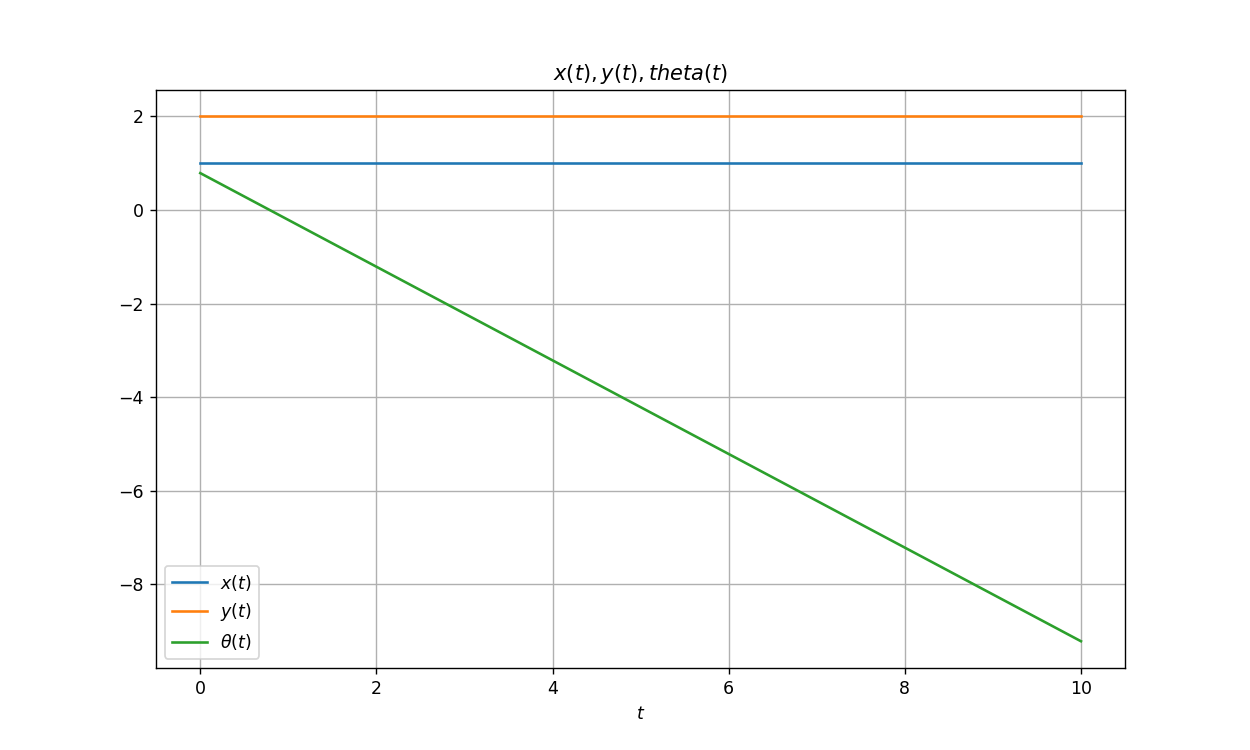

In [6]:
figure()
t = linspace(0, tf, 1000)
x= result["sol"](t)[0]
y= result["sol"](t)[1]
theta=result["sol"](t)[2]
plot(t, x,label=r'$x(t)$')
plot(t,y,label=r'$y(t)$')
plot(t, theta,label=r'$\theta(t)$')
grid(True); xlabel("$t$"); title("$x(t), y(t), theta(t)$")
legend()

In [242]:
def omega_l(t):
    if t <= 5.0:
        return pi * D
    else:
        return 0.0
    
def omega_r(t):
    if t >= 5.0:
        return pi * D
    else:
        return 0.0

In [243]:
def f1(t, X):
    x, y, theta = X
    dtheta=R*(omega_r(t) - omega_l(t))/D
    dx= cos(theta)*(omega_r(t) + omega_l(t))*(R/2)
    dy= sin(theta)*(omega_r(t) + omega_l(t))*(R/2)
    dX = array([dx, dy, dtheta])
    return dX

In [249]:
from scipy.integrate import solve_ivp
x0=0
y0=0
theta0=0.0
tf = 10
X0 = [x0, y0, theta0]
result1 = solve_ivp(f1, [0.0, tf], X0, dense_output=True)

<IPython.core.display.Javascript object>


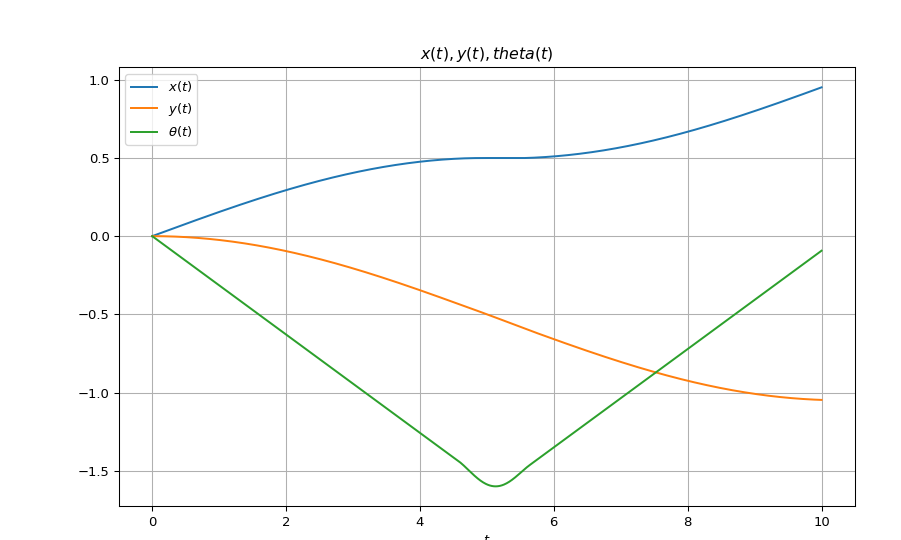

In [250]:
figure()
t = linspace(0, tf, 1000)
x= result1["sol"](t)[0]
y= result1["sol"](t)[1]
theta=result1["sol"](t)[2]
plot(t, x,label=r'$x(t)$')
plot(t,y,label=r'$y(t)$')
plot(t, theta,label=r'$\theta(t)$')
grid(True); xlabel("$t$"); title("$x(t), y(t), theta(t)$")
legend()

<IPython.core.display.Javascript object>


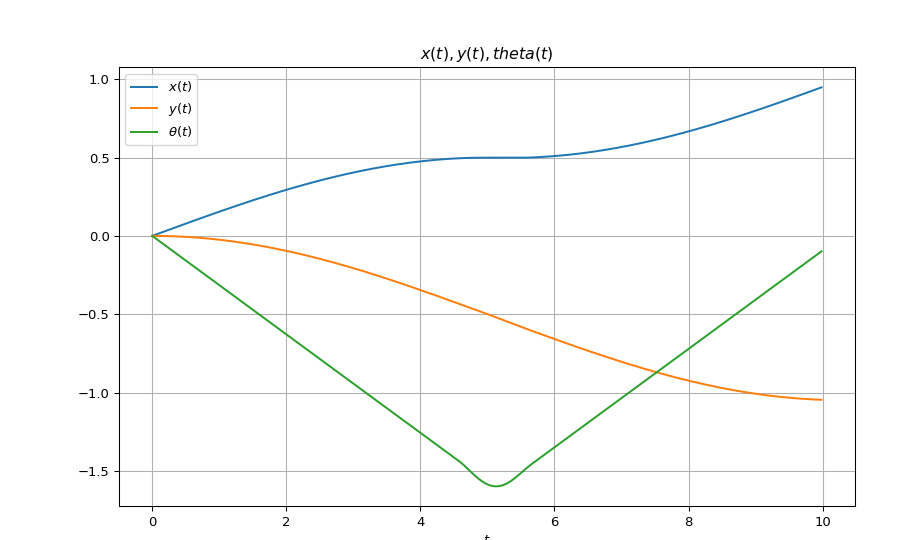

In [251]:
figure()
t_span = [0.0, 10.0]
dt = 1.0 / 60.0
t = arange(t_span[0], t_span[1], dt)
x= result1["sol"](t)[0]
y= result1["sol"](t)[1]
theta=result1["sol"](t)[2]
xlabel("time")
plot(t, x,label=r'$x(t)$')
plot(t,y,label=r'$y(t)$')
plot(t, theta,label=r'$\theta(t)$')
grid(True); xlabel("$t$"); title("$x(t), y(t), theta(t)$")
legend()

<IPython.core.display.Javascript object>


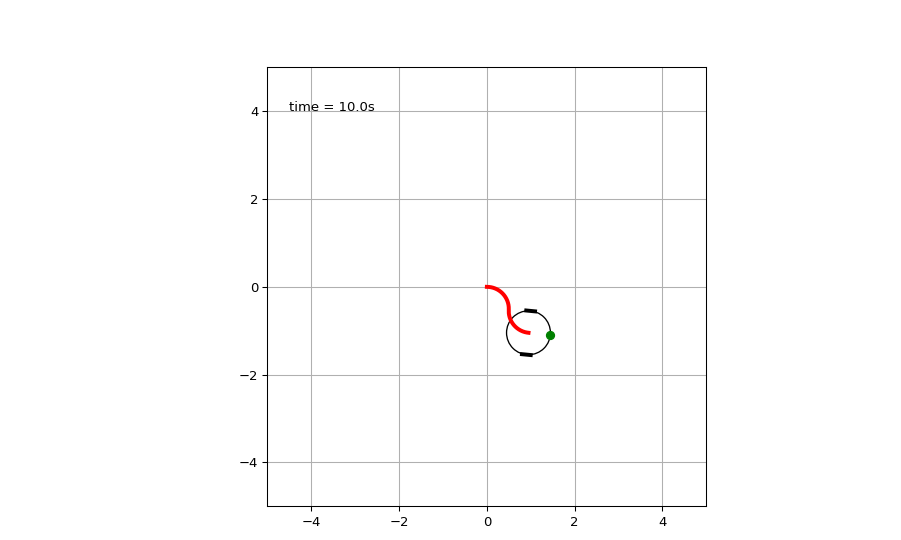

In [262]:
fig = figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-5, 5), ylim=(-5, 5))
ax.set_aspect('equal')
ax.grid()

line1, = ax.plot([], [], "k", lw=3)
line2, = ax.plot([], [], "k", lw=3)
line3, = ax.plot([], [], "og", lw=3)
line4, = ax.plot([], [], "r", lw=3)
circle = patches.Circle([0.0, 0.0], radius=D/2, fc="k",fill=False)
ax.add_artist(circle)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line1.set_data([], [])
    line2.set_data([], [])
    time_text.set_text('')
    return  line3,line1,line2,circle, time_text


def animate(i):
    x_front=x[i]+(D/2)* cos(theta[i])
    y_front= y[i]+(D/2) * sin(theta[i])
    x_1=x[i]+(D/2)* cos((pi)/2+theta[i])-R*cos(theta[i])
    y_1=y[i]+(D/2)* sin((pi)/2+theta[i])-R*sin(theta[i])
    x_2=x[i]+(D/2)* cos((pi)/2+theta[i])+R*cos(theta[i])
    y_2=y[i]+(D/2)* sin((pi)/2+theta[i])+R*sin(theta[i])
    x_3=x[i]+(D/2)* cos(-(pi)/2+theta[i])-R*cos(theta[i])
    y_3=y[i]+(D/2)* sin(-(pi)/2+theta[i])-R*sin(theta[i])
    x_4=x[i]+(D/2)* cos(-(pi)/2+theta[i])+R*cos(theta[i])
    y_4=y[i]+(D/2)* sin(-(pi)/2+theta[i])+R*sin(theta[i])
    line3.set_data(x_front,y_front)
    thisx = [x_1, x_2]
    thisy = [y_1, y_2]
    line1.set_data(thisx, thisy)
    thisx = [x_3, x_4]
    thisy = [ y_3, y_4]
    line2.set_data(thisx, thisy)
    line4.set_data(x[:i+1], y[:i+1])
    circle.center = [x[i], y[i]]
    time_text.set_text(time_template % (i*dt))
    return line1,line2,circle, time_text


anim = animation.FuncAnimation(fig, animate, range(0, len(t)),
                              interval=dt*1000, blit=True, init_func=init, repeat=False)